# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [35]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import math


In [36]:
os.chdir('C:\\LUML\\Springboard\\EDA\\human_temp')
df = pd.read_csv('data/human_body_temperature.csv')

In [37]:
# check the data types
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

In [38]:
#number of rows in the dataset
len(df)

130

In [67]:
# Check top 5 records - two continuous variables and once categorical variable
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [68]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [40]:
df.groupby('gender').size() # 65 females and 65 males

gender
F    65
M    65
dtype: int64

# Checking if the distribution of temperatures are in normal distribution

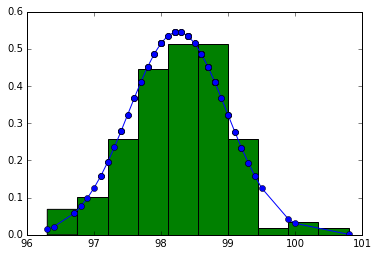

In [72]:
temp = sorted(df.temperature) # list of all temperatures sorted
fit = stats.norm.pdf(temp, np.mean(temp), np.std(temp)) # this is a fitting indeed
pl.plot(temp, fit, '-o')
pl.hist(temp, normed = True)
pl.show()

# yes, the distribution of temperatures is approximately close to normal. 

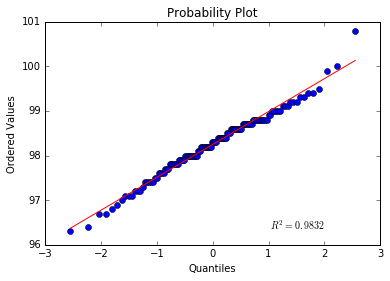

In [74]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# Source: From Springboard Slack community
# R^2 is close to 1 - this indicates a good fit for normal distribution
stats.probplot(temp, dist="norm", plot=plt)
plt.show()

# Find out if the true population mean is 98.6? Hypothesis testing

In [92]:
# Reference: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html
# R statistics - https://www.getdatajoy.com/examples/r-statistics
# https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

# The sample size is 130 (>30) and we don't have standard deviation for full population. We only know
# the standard deviation of the sample. 


populationmean = 98.6
samplemean = np.mean(temp)
sd = np.std(temp)
alpha = 0.95 # confidence interval
n = 130 # sample size
dof = n-1 # degrees of freedom

t_statistic, p_value = stats.ttest_1samp(temp, populationmean)
print ("one-sample t-test t-statistic:", t_statistic, "p-value:", p_value)

sigma = sd /math.sqrt(n)
confidenceinterval = stats.t.interval(alpha, # confidence interval
                                      df = dof, # degrees of freedom
                                      loc = samplemean, # sample mean
                                      scale = sigma)

print ("Confidence Interval:", confidenceinterval)

one-sample t-test t-statistic: -5.45482329236 p-value: 2.41063204156e-07
Confidence Interval: (98.12249318821641, 98.375968350245145)


In [93]:
# The critical t value for 95% confidence interval is [-1.97, 1.97] and the t_statistic is -5.45
# which is way outside the range. So we reject the null hypothesis. It means, 98.6 is not true mean 
# of the population.

# which test we need to use (z-test vs t-test)?

In [94]:
# for large sample size both the tests gives similar results

z = (samplemean - populationmean)/ (sd/np.sqrt(n))
print("z-statistic:", z)
z_critical = stats.norm.ppf(q = 0.975) #95% confidence interval
print("z-critical:", z_critical)
# the critical values for both z-test and t-test for 95% confidence interval are almost equal. 
# both these tests can be used for large sample size

z-statistic: -5.47592520208
z-critical: 1.95996398454


# At what temperature should we consider someone's temperature to be "abnormal"?

In [95]:
margin_of_error = z_critical * sigma
ConfInterval = [samplemean - margin_of_error, samplemean + margin_of_error]
print ("confidence interval:", ConfInterval)

confidence interval: [98.123682111456645, 98.37477942700491]


In [96]:
# Any temperature value outside the above confidence interval range can be considered as "abnormal"

# Is there a significant difference between males and females in normal temperature?

In [104]:
#divide the sample to two samples based on gender
maletemp = sorted(df[df.gender == 'M'].temperature)
femaletemp = sorted(df[df.gender == 'F'].temperature)

In [106]:
stats.ttest_ind(a= maletemp,
                b= femaletemp,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.023938264182940983)

In [ ]:
# p-value is small - 2% so we can reject the null hypothesist as we are 95% confident that there is
# no difference in mean temperature between males and females.